In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

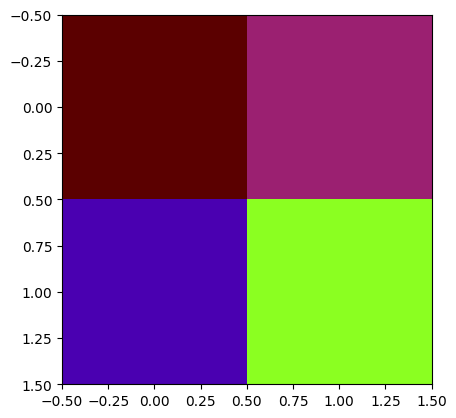

In [5]:
# random 2x2 test image
A = np.array([ [[91,0 ,0], [155,32,113]], [[74,0,177], [139,255,33]] ])
plt.imshow(A)

#### 1. Loading Images into the Console

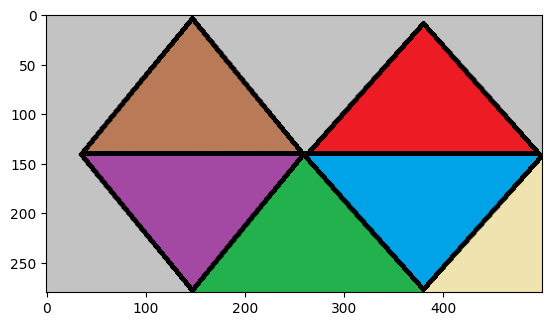

In [10]:
img = mpimg.imread('test_cases/test.png')
plt.imshow(img)

Different images seems to have different sizes, in the case of the test.png file, it is a 280x500 with 4 channels, dim size (280x500x4)

In [12]:
img.shape # (height, width, channels)

(280, 500, 4)

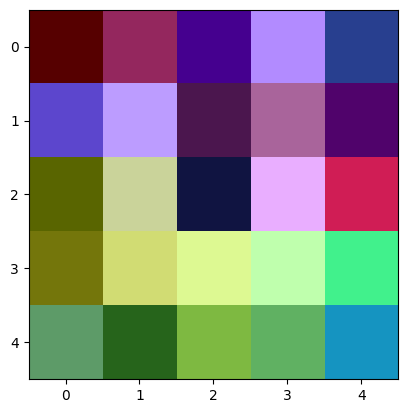

In [14]:
img2 = mpimg.imread('test_cases/mini_test.jpg')
img2.shape # (height, width, channels)
plt.imshow(img2)

In [57]:
from piceditclass import PicEdit # personal class, to edit later purely for testing purposes
image_loaded = PicEdit.load_image('test_cases/test.png')

In [43]:
image_loaded[1] # this is the mask, if all set to 1 then it will display the full image

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

The following code below shows how the mask is applied. The height and width are the same, where the mask is 1 for each pixel meaning "show", and it is the full image. The channels is just the color dimension (RGB)

In [44]:
image_loaded[0].shape, image_loaded[1].shape # (height, width, channels)

((280, 500, 3), (280, 500))

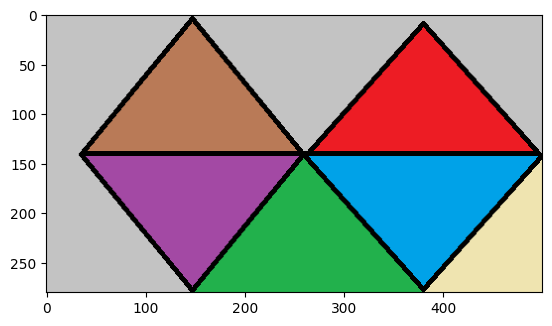

In [45]:
plt.imshow(image_loaded[0])

In [70]:
def compute_edge(mask):  # helper function to compute the edge of the mask
    rsize, csize = len(mask), len(mask[0]) 
    edge = np.zeros((rsize,csize))
    if np.all((mask == 1)): return edge        
    for r in range(rsize):
        for c in range(csize):
            if mask[r][c]!=0:
                if r==0 or c==0 or r==len(mask)-1 or c==len(mask[0])-1:
                    edge[r][c]=1
                    continue
                
                is_edge = False                
                for var in [(-1,0),(0,-1),(0,1),(1,0)]:
                    r_temp = r+var[0]
                    c_temp = c+var[1]
                    if 0<=r_temp<rsize and 0<=c_temp<csize:
                        if mask[r_temp][c_temp] == 0:
                            is_edge = True
                            break
    
                if is_edge == True:
                    edge[r][c]=1
            
    return edge

def save_image(filename, image):
    img = image.astype(np.uint8)
    mpimg.imsave(filename,img)

def load_image(filename):
    img = mpimg.imread(filename)
    if len(img[0][0])==4: # if png file
        img = np.delete(img, 3, 2)
    if type(img[0][0][0])==np.float32:  # if stored as float in [0,..,1] instead of integers in [0,..,255]
        img = img*255
        img = img.astype(np.uint8)
    mask = np.ones((len(img),len(img[0]))) # create a mask full of "1" of the same size of the laoded image
    img = img.astype(np.int32)
    return img, mask

def display_image(image, mask):
    # if using Spyder, please go to "Tools -> Preferences -> IPython console -> Graphics -> Graphics Backend" and select "inline"
    tmp_img = image.copy()
    edge = compute_edge(mask)
    for r in range(len(image)):
        for c in range(len(image[0])):
            if edge[r][c] == 1:
                tmp_img[r][c][0]=255
                tmp_img[r][c][1]=0
                tmp_img[r][c][2]=0
 
    plt.imshow(tmp_img)
    plt.axis('off')
    plt.show()
    print("Image size is",str(len(image)),"x",str(len(image[0])))

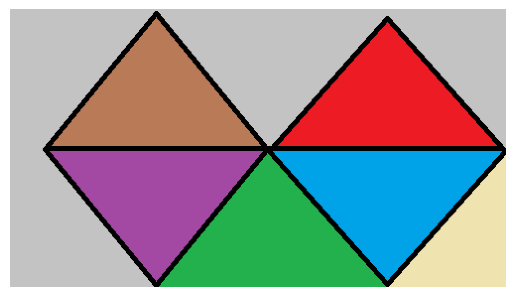

Image size is 280 x 500


In [72]:
image, mask = load_image('test_cases/test.png')
display_image(image, mask)

# Functional Methods 

### 2.2.1. Changing the Brightness

Add to each of the 3 RGB components an integer values between -255 and +255. There are limits to (0, 255) to the RGB standards. [Try using the np.min and np.max functions to your advantage]. No value in the matrix should be outside the range 0-255. Input value will be queried by the user. 

Checklist:
- Use the load image method. 
- Use the copy of the image.
- Use the user input integer to up or lower the brightness (-255, +255) range, implement error checking here.
- Manipulate the array
- Show the final result.


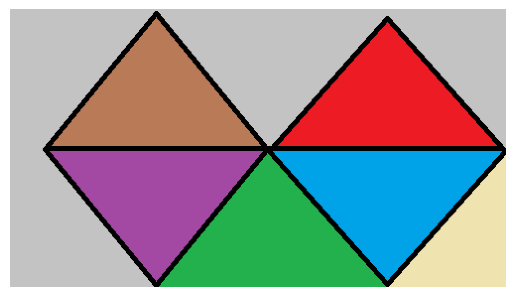

Image size is 280 x 500


In [80]:
# Load the image using the function
image, mask = load_image('test_cases/test.png')
# Display the image using the function
display_image(image, mask)
# use copy to avoid modifying the original image
image_copy = image.copy()

In [79]:
min_brightness, max_brightness = 0, 255
# Set the brightness of the image to the minimum brightness


array([[[195, 195, 195],
        [195, 195, 195],
        [195, 195, 195],
        ...,
        [195, 195, 195],
        [195, 195, 195],
        [195, 195, 195]],

       [[195, 195, 195],
        [195, 195, 195],
        [195, 195, 195],
        ...,
        [195, 195, 195],
        [195, 195, 195],
        [195, 195, 195]],

       [[195, 195, 195],
        [195, 195, 195],
        [195, 195, 195],
        ...,
        [195, 195, 195],
        [195, 195, 195],
        [195, 195, 195]],

       ...,

       [[195, 195, 195],
        [195, 195, 195],
        [195, 195, 195],
        ...,
        [239, 228, 176],
        [239, 228, 176],
        [239, 228, 176]],

       [[195, 195, 195],
        [195, 195, 195],
        [195, 195, 195],
        ...,
        [239, 228, 176],
        [239, 228, 176],
        [239, 228, 176]],

       [[195, 195, 195],
        [195, 195, 195],
        [195, 195, 195],
        ...,
        [239, 228, 176],
        [239, 228, 176],
        [239, 228, 176]]